<a href="https://colab.research.google.com/github/srik6724/MAT-421/blob/main/Module_B_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17.4 Lagrange Polynomial Interpolation

Lagrange polynomial interpolation traces a single polynomial across any given set of points.

Follwing is an example of the Lagrange basis polynomials for the data set x = [1, 3, 5] and y = [2, 5, 3]. Plot each polynomial and verify the property that Pi(xj) = 1 when i = j and Pi(xj) = 0 when i != j.

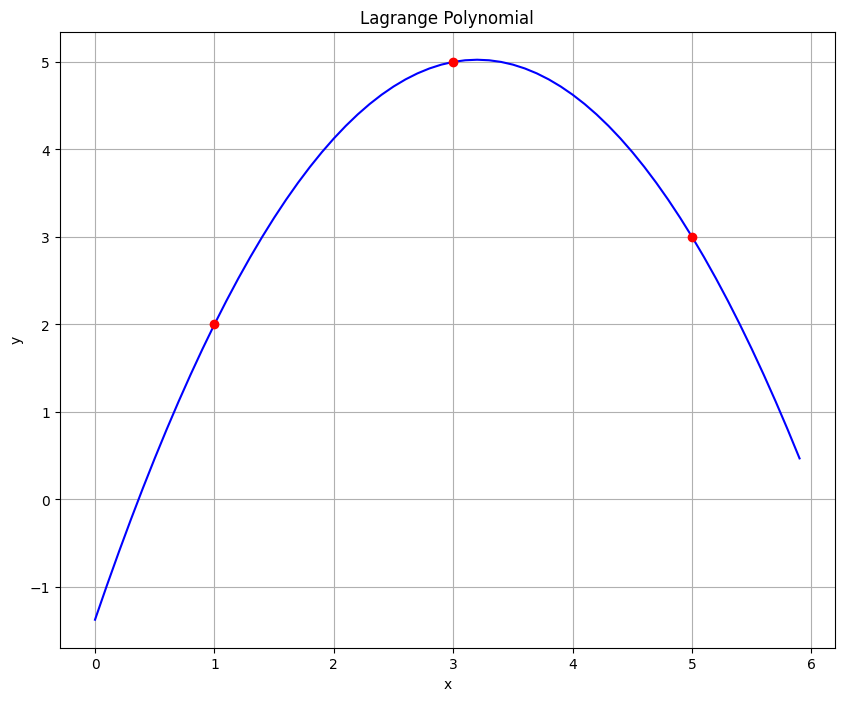

In [ ]:
from scipy.interpolate import lagrange
import numpy as np
import matplotlib.pyplot as plt

x = [1, 3, 5]
y = [2, 5, 3]

x_new = np.arange(0, 6, 0.1)

f = lagrange(x, y)
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

17.5 Newton's Polynomial Interpolation

For fitting a set of data points, Newton's polynomial interpolation also proves useful here. Following is an example of calculation of the divided differences table for x = [-7, -3, 1, 3], y = [-3, 5, 1, 2] by using Newton’s polynomial interpolation.

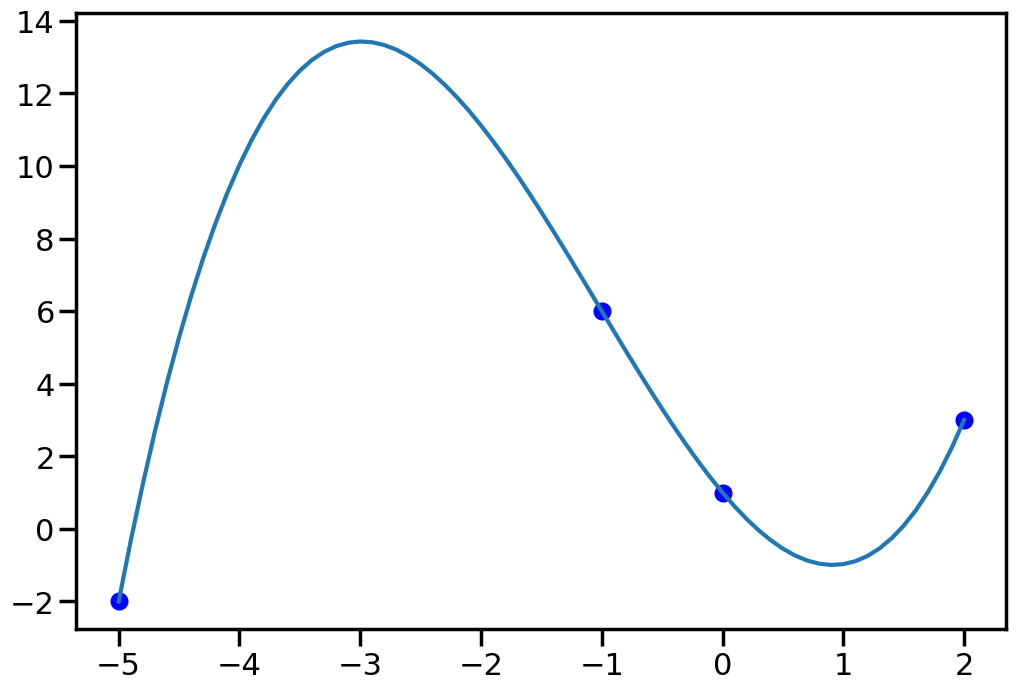

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use Seaborn to set "poster" style context
sns.set_context("poster")

%matplotlib inline

def divided_diff(x, y):

    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y

    for j in range(1,n):
      for i in range(n-j):
        coef[i][j] = \
         (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):

    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p


x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])

a_s = divided_diff(x, y)[0, :]

x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)